In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# pd.set_option('display.max_rows', None)

In [3]:
df_intern = pd.read_csv('viajeros_internacional.csv', sep= ';')

In [5]:
df_intern.head()

,País de residencia,Tipo de dato,Periodo,Total
0,Total,Dato base,2023M05,8.218.334
1,Total,Dato base,2023M04,7.235.055
2,Total,Dato base,2023M03,5.257.076
3,Total,Dato base,2023M02,4.321.152
4,Total,Dato base,2023M01,4.147.345


In [6]:
df_intern = df_intern.dropna(subset=['Total'])


In [7]:
df_intern.dtypes

País de residencia    object
Tipo de dato          object
Periodo               object
Total                 object
dtype: object

In [8]:
df_intern['Total'] = df_intern['Total'].str.replace(',', '.')
df_intern['Total'] = pd.to_numeric(df_intern['Total'], errors='coerce')


In [9]:
df_intern['País de residencia'].unique()

array(['Total', 'Alemania', 'Bélgica', 'Francia', 'Irlanda', 'Italia',
       'Países Bajos', 'Países Nórdicos', 'Portugal', 'Reino Unido',
       'Rusia', 'Suiza', 'Resto de Europa', 'Estados Unidos de América',
       'Resto América', 'Resto del Mundo'], dtype=object)

In [10]:
df_total = df_intern[df_intern['País de residencia'] == 'Total']


In [11]:
df_total.head()

,País de residencia,Tipo de dato,Periodo,Total
0,Total,Dato base,2023M05,NaN
1,Total,Dato base,2023M04,NaN
2,Total,Dato base,2023M03,NaN
3,Total,Dato base,2023M02,NaN
4,Total,Dato base,2023M01,NaN


In [12]:
# limpiar df solo con paises sin totales
df_intern = df_intern[df_intern['País de residencia'] != 'Total']

In [13]:
df_intern.head()

,País de residencia,Tipo de dato,Periodo,Total
368,Alemania,Dato base,2023M05,NaN
369,Alemania,Dato base,2023M04,NaN
370,Alemania,Dato base,2023M03,673.584
371,Alemania,Dato base,2023M02,509.883
372,Alemania,Dato base,2023M01,478.258


In [14]:
# sacar solo dato base sin acumulados
df_foreigner_clean = df_intern[df_intern['Tipo de dato'] == 'Dato base']

In [15]:
df_foreigner_clean.head()

,País de residencia,Tipo de dato,Periodo,Total
368,Alemania,Dato base,2023M05,NaN
369,Alemania,Dato base,2023M04,NaN
370,Alemania,Dato base,2023M03,673.584
371,Alemania,Dato base,2023M02,509.883
372,Alemania,Dato base,2023M01,478.258


In [16]:
# cambiar tipo fecha
df_foreigner_clean['Periodo'] = pd.to_datetime(df_foreigner_clean['Periodo'], format='%YM%m')



C:\Users\34680\AppData\Local\Temp\ipykernel_25772\508254461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foreigner_clean['Periodo'] = pd.to_datetime(df_foreigner_clean['Periodo'], format='%YM%m')


In [17]:
#  Elimina el formato hora
df_foreigner_clean['Periodo'] = df_foreigner_clean['Periodo'].dt.strftime('%Y-%m-%d')


C:\Users\34680\AppData\Local\Temp\ipykernel_25772\2209030397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foreigner_clean['Periodo'] = df_foreigner_clean['Periodo'].dt.strftime('%Y-%m-%d')


In [18]:
df_foreigner_clean = df_foreigner_clean.sort_values(by='Periodo', ascending=True)

In [19]:


# g = sns.FacetGrid(df_foreigner_clean, col='País de residencia', col_wrap=3)
# g.map(sns.barplot, 'Periodo', 'Total')
# plt.show()


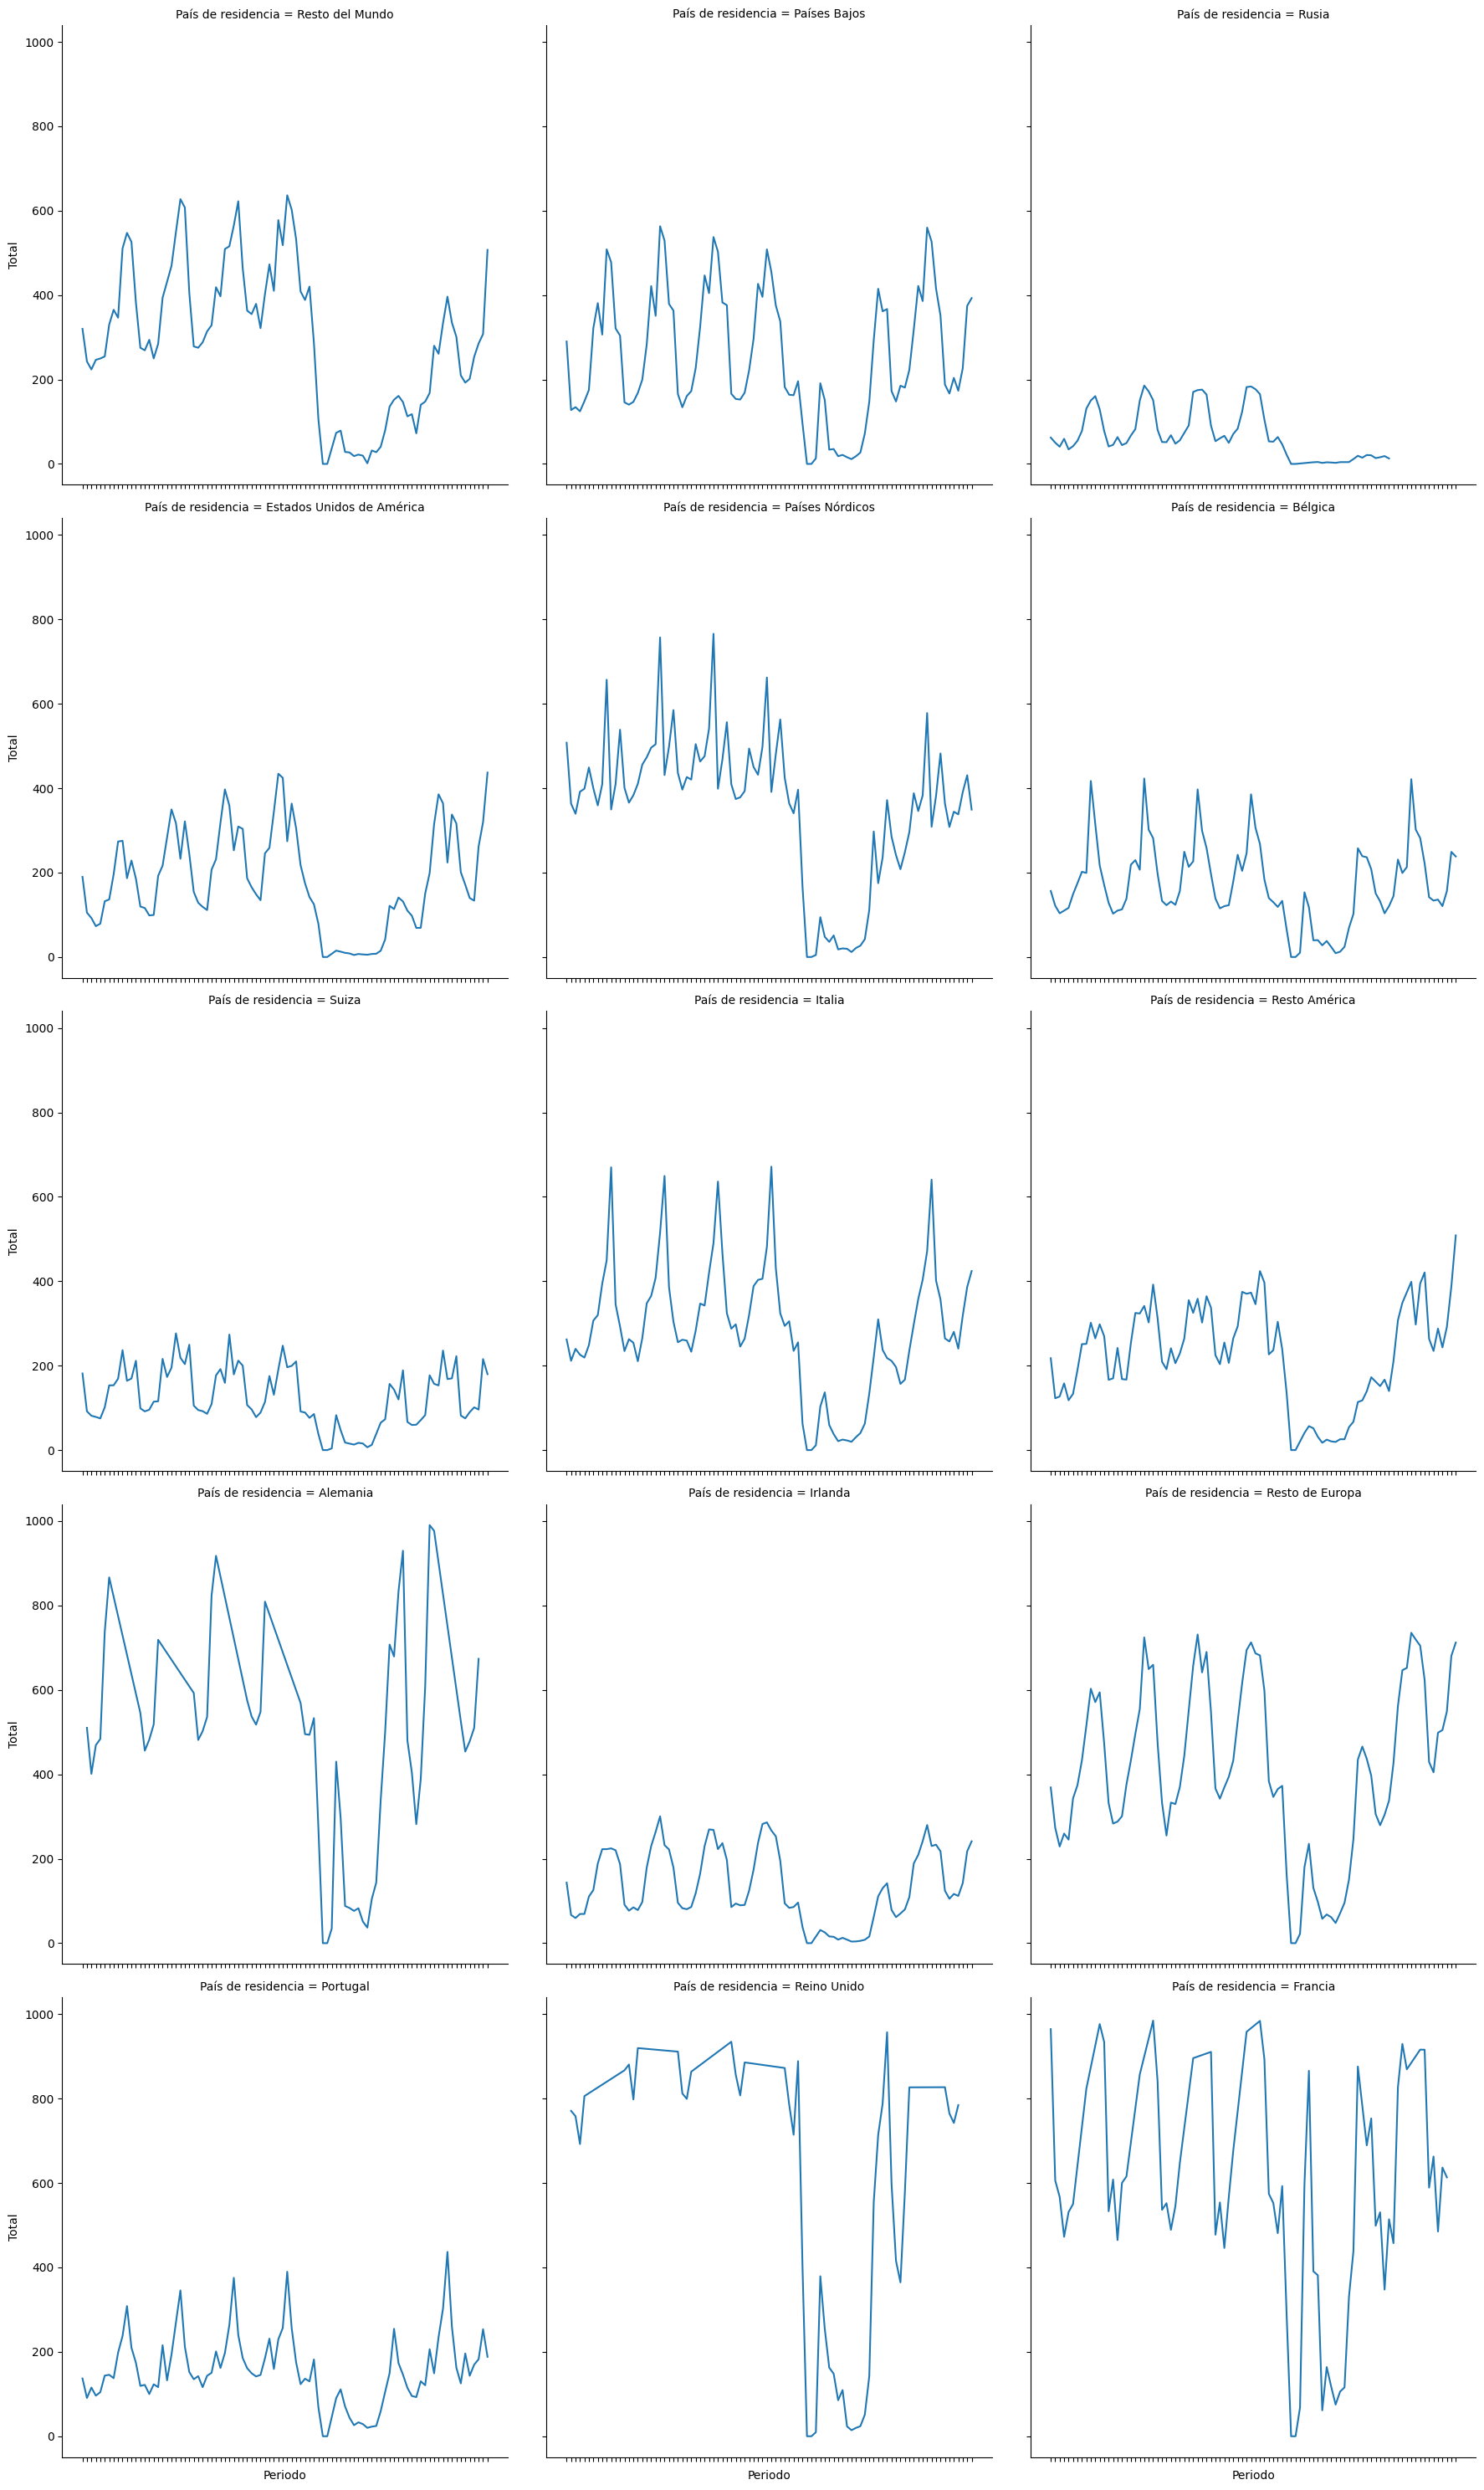

In [20]:
g = sns.FacetGrid(data=df_foreigner_clean, col='País de residencia', col_wrap=3, height=6)
g.map(sns.lineplot, 'Periodo', 'Total')
g.set_xticklabels(rotation=45)
plt.show()


In [21]:
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df_foreigner_clean, x='Periodo', y='Total', hue='País de residencia')
# plt.xticks(plt.xticks()[0][::10], rotation=45)
# plt.show()


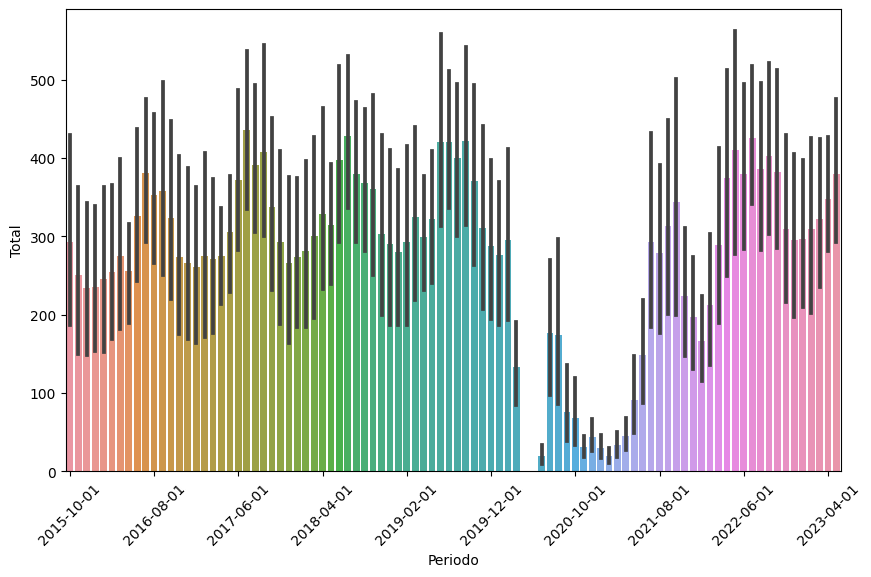

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_foreigner_clean, x='Periodo', y='Total', dodge=True,)
plt.xticks(plt.xticks()[0][::10], rotation=45)

plt.show()


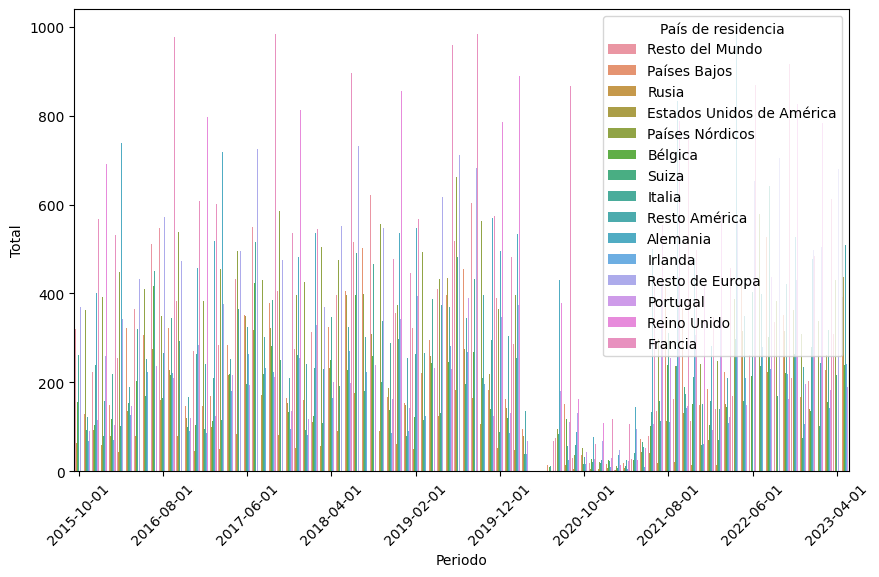

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_foreigner_clean, x='Periodo', y='Total', hue='País de residencia')
plt.xticks(plt.xticks()[0][::10], rotation=45)
ax.legend(title='País de residencia')
plt.show()





c:\Users\34680\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


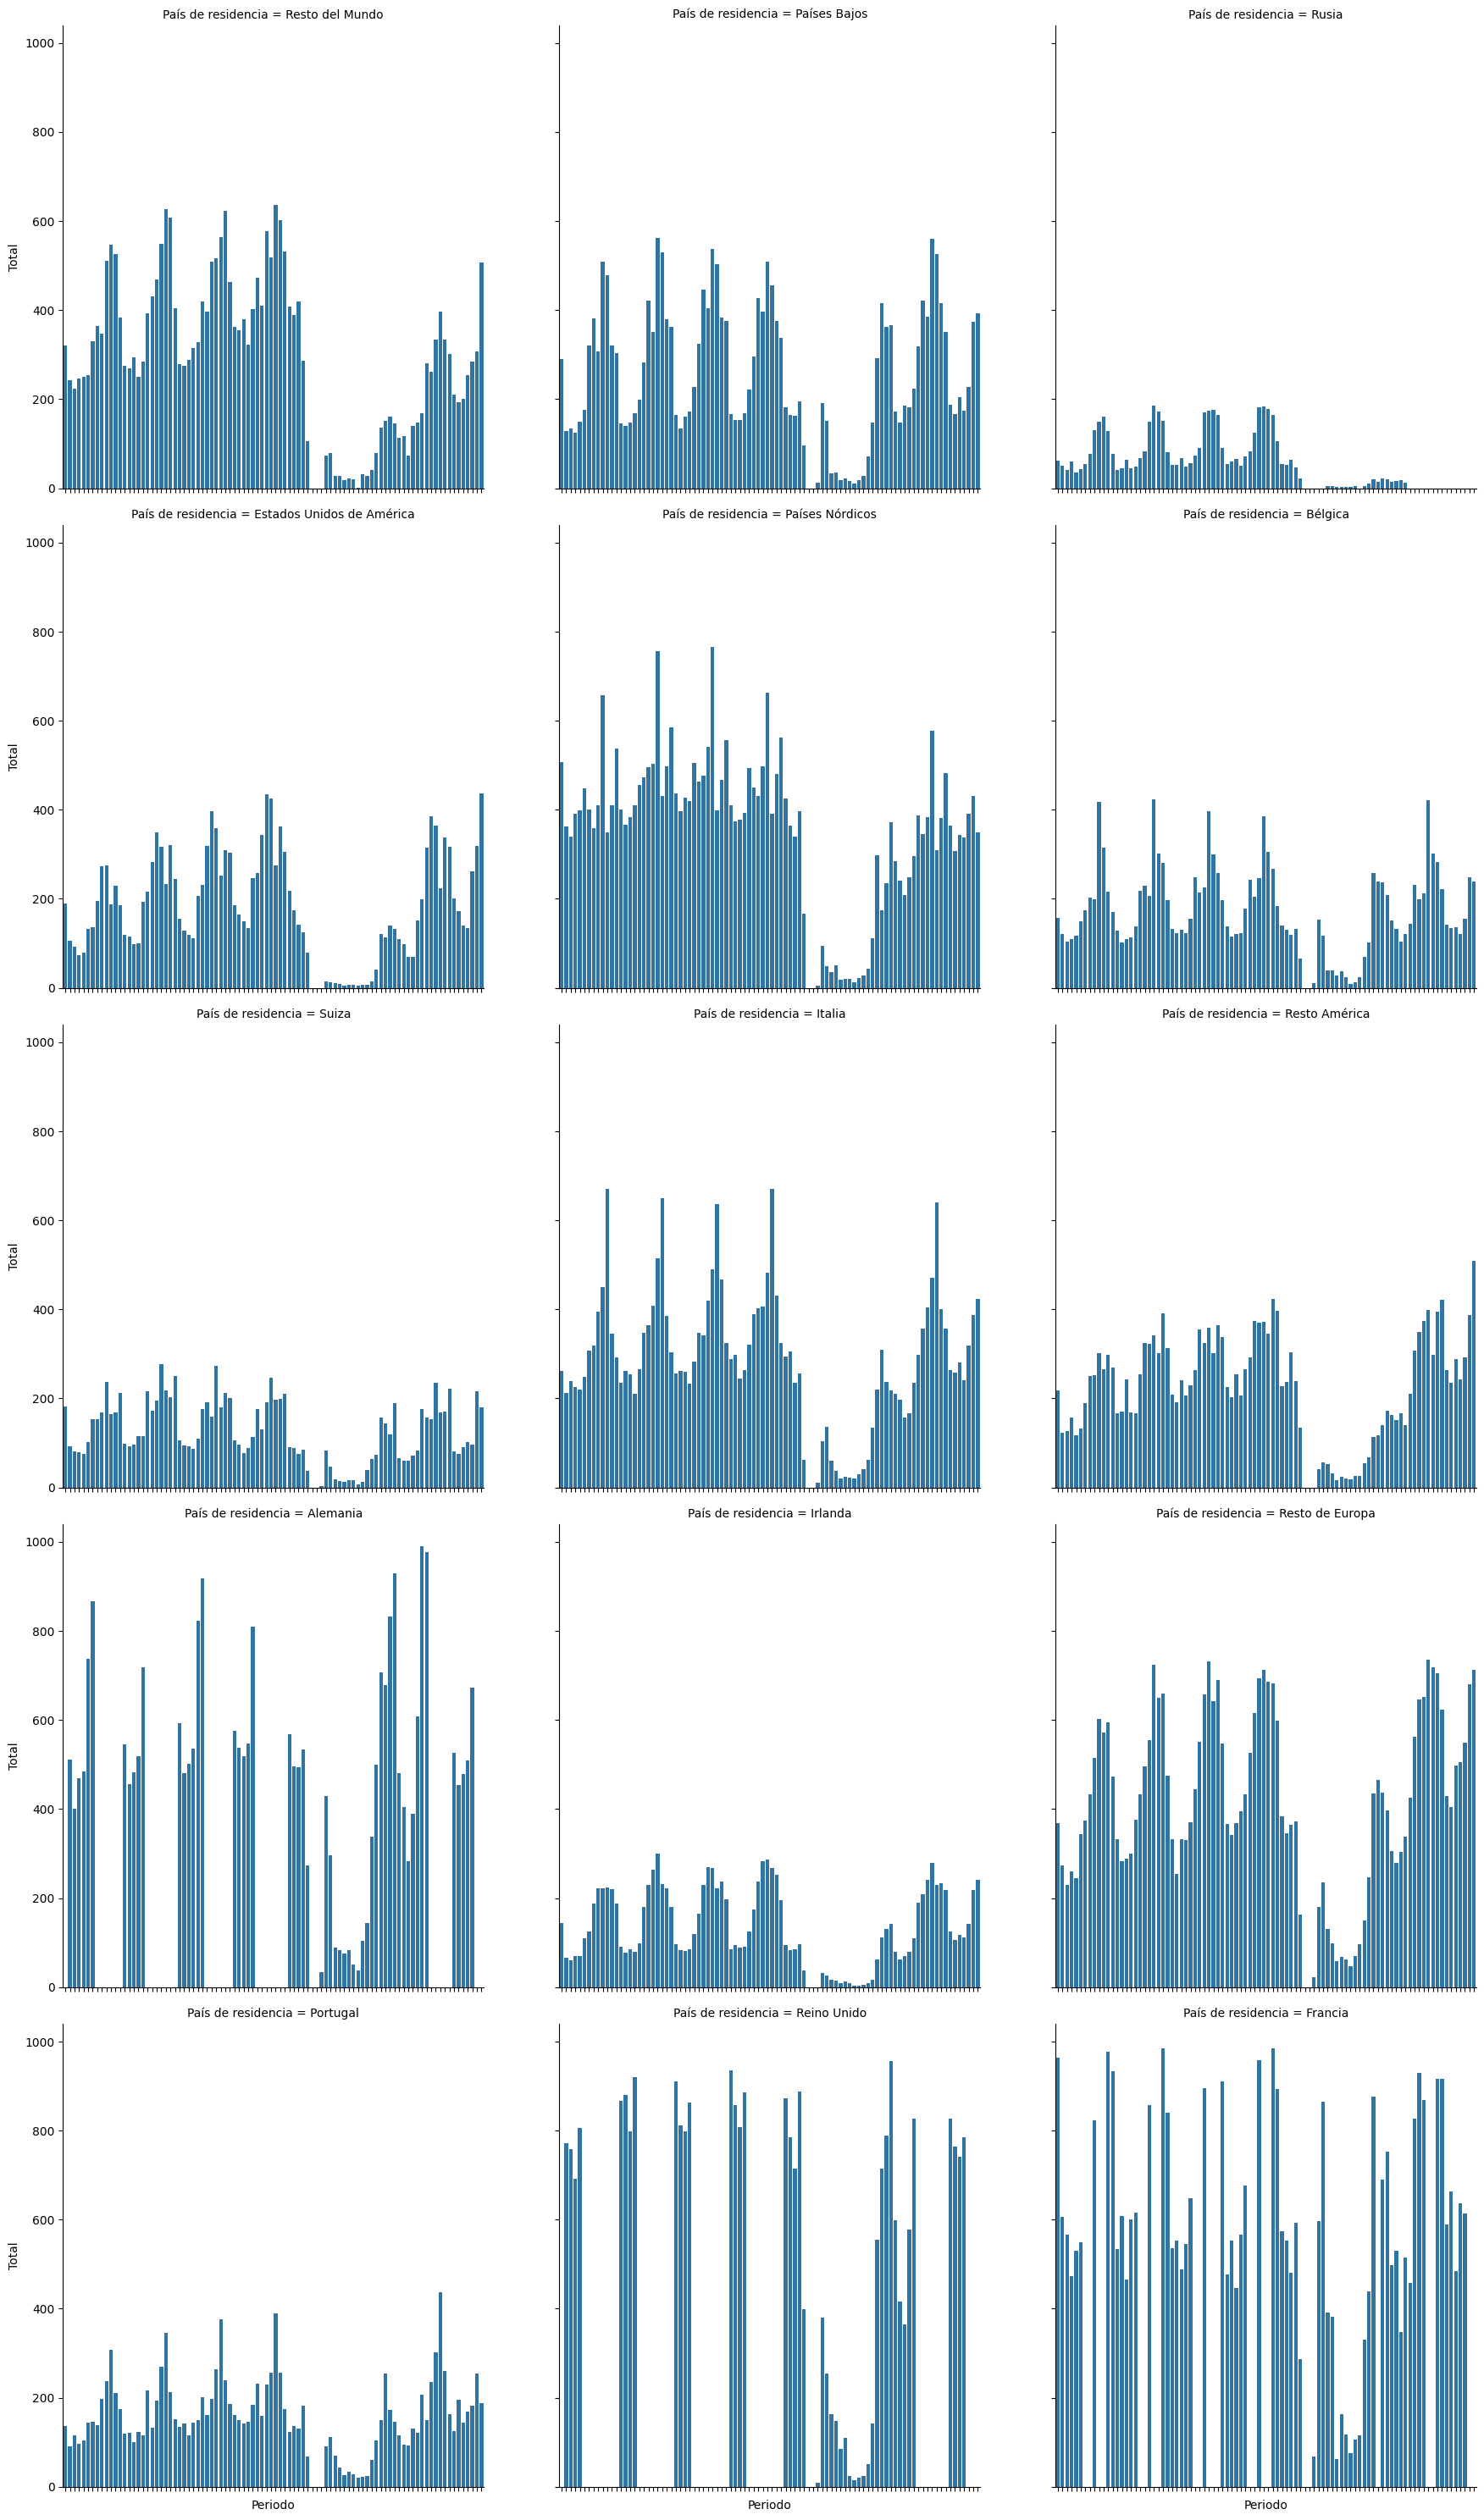

In [24]:
g = sns.FacetGrid(data=df_foreigner_clean, col='País de residencia', col_wrap=3, height=6)
g.map(sns.barplot, 'Periodo', 'Total', dodge=True)
g.set_xticklabels(rotation=45)
plt.show()


In [25]:
pivot_df = df_intern.pivot_table(index=['País de residencia', 'Periodo'], columns='Tipo de dato', values='Total')

In [26]:
pivot_df.head()

Tipo de dato                Acumulado en lo que va de año  Dato base  \
País de residencia Periodo                                             
Alemania           2015M10                            NaN        NaN   
                   2015M11                            NaN    510.192   
                   2015M12                            NaN    401.150   
                   2016M01                        469.017    469.017   
                   2016M02                        952.895    483.878   

Tipo de dato                Tasa de variación acumulada  \
País de residencia Periodo                                
Alemania           2015M10                          NaN   
                   2015M11                          NaN   
                   2015M12                          NaN   
                   2016M01                        -0.51   
                   2016M02                         3.65   

Tipo de dato                Tasa de variación anual  
País de residencia Periodo                           
Alemania           2015M10                     1.64  
                   2015M11                    -5.49  
                   2015M12                   -16.17  
                   2016M01                    -0.51  
                   2016M02                     8.02

In [27]:
pivot_df.isna().sum()

Tipo de dato
Acumulado en lo que va de año    755
Dato base                        106
Tasa de variación acumulada       68
Tasa de variación anual           82
dtype: int64